In [598]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [599]:
df=pd.read_csv("combined_datas_final.csv")
df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats.1,Color,Gear Box,Drive Type,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,998 CC,5.0,White,5 Speed,FWD,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,1497 CC,5.0,White,5 Speed,FWD,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,1199 CC,5.0,Red,5 Speed,FWD,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,1248 CC,5.0,Gray,5 Speed,FWD,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,₹ 5.10 Lakh,Third Party insurance,"10,000 Kms",25.24 kmpl,998 CC,5.0,Others,5-Speed,NaN,Kolkata
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,₹ 1.80 Lakh,Third Party insurance,"1,20,000 Kms",22.74 kmpl,796 CC,5.0,Others,5 Speed,FWD,Kolkata
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,₹ 5.50 Lakh,Third Party insurance,"50,000 Kms",11.74 kmpl,1796 CC,5.0,Others,7 Speed,RWD,Kolkata
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,₹ 1.40 Lakh,Third Party insurance,"40,000 Kms",18.5 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Kolkata


In [600]:
df.isnull().sum()

it                       0
ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
owner                    0
oem                      0
model                    0
modelYear                0
price                    0
Insurance Validity       4
Kms Driven               2
Mileage                287
Engine                   4
Seats.1                  6
Color                    3
Gear Box              2680
Drive Type            3714
City                     0
dtype: int64

missing values handling

In [601]:
# drop unwanted columns from the dataframe
df.drop(columns=["it","km","Gear Box","Drive Type"],inplace=True,axis=1)

In [602]:
df["bt"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', nan, 'Wagon'],
      dtype=object)

In [603]:
# retrive nan values from body type
df[pd.isna(df["bt"])]

,ft,bt,transmission,ownerNo,owner,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats.1,Color,City
3382,Petrol,NaN,Automatic,1,1st Owner,Toyota,Toyota Vellfire,2023,₹ 1.19 Crore,Comprehensive,"10,500 Kms",NaN,2487 CC,7.0,White,Delhi
5390,Petrol,NaN,Manual,1,1st Owner,Maruti,Maruti Eeco,2019,₹ 4.95 Lakh,Comprehensive,"13,500 Kms",19.71 kmpl,1197 CC,5.0,Silver,Hyderabad
5411,Petrol,NaN,Manual,1,1st Owner,Maruti,Maruti Eeco,2020,₹ 5.20 Lakh,Comprehensive,"16,415 Kms",19.71 kmpl,1197 CC,5.0,Grey,Hyderabad
8114,Petrol,NaN,Manual,1,1st Owner,Maruti,Maruti Eeco,2019,₹ 3.95 Lakh,Comprehensive,"21,166 Kms",19.71 kmpl,1197 CC,5.0,Blue,Kolkata


In [604]:
# replace nan values with model name
df.loc[df['model']=='Toyota Vellfire','bt'] = 'Minivans'
df.loc[df['model']=='Maruti Eeco','bt'] = 'Minivans'

In [605]:
# drop nan values
df.dropna(subset=["Insurance Validity","Kms Driven","Engine","Color"],inplace=True)

In [606]:
df.isnull().sum()

ft                      0
bt                      0
transmission            0
ownerNo                 0
owner                   0
oem                     0
model                   0
modelYear               0
price                   0
Insurance Validity      0
Kms Driven              0
Mileage               284
Engine                  0
Seats.1                 6
Color                   0
City                    0
dtype: int64

In [607]:
# retrive seats nan values
df[pd.isna(df["Seats.1"])]

,ft,bt,transmission,ownerNo,owner,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats.1,Color,City
1175,Petrol,Hatchback,Manual,3,3rd Owner,Maruti,Maruti Estilo,2009,₹ 2 Lakh,Third Party insurance,"40,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Bangalore
3528,Petrol,SUV,Manual,2,2nd Owner,Nissan,Nissan Kicks,2019,₹ 7 Lakh,Third Party insurance,"60,000 Kms",NaN,1498 CC,NaN,Gray,Delhi
6211,Diesel,SUV,Manual,2,2nd Owner,Ford,Ford Endeavour,2008,₹ 3.90 Lakh,Third Party insurance,"1,20,000 Kms",11.4 kmpl,2953 CC,NaN,Black,Jaipur
7608,Petrol,Hatchback,Manual,2,2nd Owner,Maruti,Maruti Estilo,2010,₹ 1.20 Lakh,Third Party insurance,"70,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Kolkata
7669,Petrol,Hatchback,Manual,2,2nd Owner,Maruti,Maruti Estilo,2009,₹ 1.20 Lakh,Third Party insurance,"50,000 Kms",19.5 kmpl,1061 CC,NaN,Gold,Kolkata
7745,Diesel,Sedan,Manual,1,1st Owner,Hindustan Motors,Ambassador,2014,₹ 1.20 Lakh,Third Party insurance,"1,20,000 Kms",12.8 kmpl,1995 CC,NaN,Yellow,Kolkata


In [608]:
# Dictionary mapping models to correct seat counts
seats_mapping = {
    'Maruti Estilo': 5,
    'Nissan Kicks': 5,
    'Ford Endeavour': 7,
    'Ambassador': 5  # Hindustan Motors Ambassador
}


In [609]:
# Fill NaN values in 'Seats.1' using the model-based mapping
df['Seats.1'] = df.apply(
    lambda row: seats_mapping[row['model']] if pd.isna(row['Seats.1']) and row['model'] in seats_mapping else row['Seats.1'],
    axis=1)

In [610]:
df.isnull().sum()

ft                      0
bt                      0
transmission            0
ownerNo                 0
owner                   0
oem                     0
model                   0
modelYear               0
price                   0
Insurance Validity      0
Kms Driven              0
Mileage               284
Engine                  0
Seats.1                 0
Color                   0
City                    0
dtype: int64

In [611]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 0 to 8368
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8359 non-null   object 
 1   bt                  8359 non-null   object 
 2   transmission        8359 non-null   object 
 3   ownerNo             8359 non-null   int64  
 4   owner               8359 non-null   object 
 5   oem                 8359 non-null   object 
 6   model               8359 non-null   object 
 7   modelYear           8359 non-null   int64  
 8   price               8359 non-null   object 
 9   Insurance Validity  8359 non-null   object 
 10  Kms Driven          8359 non-null   object 
 11  Mileage             8075 non-null   object 
 12  Engine              8359 non-null   object 
 13  Seats.1             8359 non-null   float64
 14  Color               8359 non-null   object 
 15  City                8359 non-null   object 
dtypes: float64(

Data types changing

In [612]:
import pandas as pd

# Clean 'Kms Driven' column
df['Kms Driven'] = (
    df['Kms Driven']
    .astype(str)
    .str.replace('Kms', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)
df['Kms Driven'] = pd.to_numeric(df['Kms Driven'], errors='coerce')

# Clean 'Mileage' column
df['Mileage'] = (
    df['Mileage']
    .astype(str)
    .str.replace('kmpl', '', regex=False)
    .str.replace('km/kg', '', regex=False)
    .str.strip()
)
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Clean 'Engine' column
df['Engine'] = (
    df['Engine']
    .astype(str)
    .str.replace('CC', '', regex=False)
    .str.strip()
)
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')


In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 0 to 8368
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8359 non-null   object 
 1   bt                  8359 non-null   object 
 2   transmission        8359 non-null   object 
 3   ownerNo             8359 non-null   int64  
 4   owner               8359 non-null   object 
 5   oem                 8359 non-null   object 
 6   model               8359 non-null   object 
 7   modelYear           8359 non-null   int64  
 8   price               8359 non-null   object 
 9   Insurance Validity  8359 non-null   object 
 10  Kms Driven          8359 non-null   int64  
 11  Mileage             8075 non-null   float64
 12  Engine              8359 non-null   int64  
 13  Seats.1             8359 non-null   float64
 14  Color               8359 non-null   object 
 15  City                8359 non-null   object 
dtypes: float64(

In [614]:
df['price']



0          ₹ 4 Lakh
1       ₹ 8.11 Lakh
2       ₹ 5.85 Lakh
3       ₹ 4.62 Lakh
4       ₹ 7.90 Lakh
           ...     
8364    ₹ 5.10 Lakh
8365    ₹ 1.80 Lakh
8366    ₹ 5.50 Lakh
8367    ₹ 1.40 Lakh
8368       ₹ 5 Lakh
Name: price, Length: 8359, dtype: object

In [615]:
df['price'].str.contains('Lakh').sum()


np.int64(8230)

In [616]:
df['price'].str.contains('Crore').sum()


np.int64(20)

In [617]:
df[~df['price'].str.contains('Lakh', na=False)]['price'].unique()


array(['₹ 58,000 ', '₹ 55,000 ', '₹ 70,000 ', '₹ 40,000 ', '₹ 80,000 ',
       '₹ 1.30 Crore', '₹ 75,000 ', '₹ 65,000 ', '₹ 56,000 ', '₹ 60,000 ',
       '₹ 76,000 ', '₹ 50,000 ', '₹ 1.10 Crore', '₹ 1.18 Crore',
       '₹ 45,000 ', '₹ 1.13 Crore', '₹ 49,000 ', '₹ 87,000 ', '₹ 90,000 ',
       '₹ 1.32 Crore', '₹ 1.38 Crore', '₹ 3.95 Crore', '₹ 1.55 Crore',
       '₹ 85,000 ', '₹ 1.59 Crore', '₹ 61,000 ', '₹ 2.45 Crore',
       '₹ 95,000 ', '₹ 1.19 Crore', '₹ 4.15 Crore', '₹ 2.69 Crore',
       '₹ 33,000 ', '₹ 89,999 ', '₹ 1.03 Crore', '₹ 86,000 ',
       '₹ 2.60 Crore', '₹ 96,000 ', '₹ 69,000 ', '₹ 1.05 Crore',
       '₹ 28,001 ', '₹ 35,840 ', '₹ 93,982 ', '₹ 68,063 ', '₹ 66,000 ',
       '₹ 94,353 ', '₹ 96,295 ', '₹ 73,000 ', '₹ 75,697 ', '₹ 94,723 ',
       '₹ 54,000 ', '₹ 62,000 ', '₹ 1.50 Crore', '₹ 79,000 ', '₹ 72,000 ',
       '₹ 98,000 ', '₹ 2.10 Crore', '₹ 99,703 ', '₹ 48,000 ', '₹ 99,000 ',
       '₹ 28,000 ', '₹ 35,000 '], dtype=object)

In [618]:
print(repr(df['price'].iloc[0]))


'₹ 4 Lakh'


In [619]:
def clean_price_str(s):
    s = s.replace('₹', '').replace('₹ 4 Lakh', ' ').strip()
    s = ' '.join(s.split())  # remove extra spaces
    return s

df['price_clean'] = df['price'].apply(clean_price_str)
print(df['price_clean'].unique())


['4 Lakh' '8.11 Lakh' '5.85 Lakh' ... '1.58 Lakh' '35,000' '10.82 Lakh']


In [620]:
def price_to_lakh(price_str):
    if 'Crore' in price_str:
        val = float(price_str.replace('Crore', '').strip())
        return val * 100
    elif 'Lakh' in price_str:
        val = float(price_str.replace('Lakh', '').strip())
        return val
    else:
        val = float(price_str.replace(',', '').strip())
        return val / 100000



In [621]:
df['price_lakh'] = df['price_clean'].apply(price_to_lakh)


In [622]:
print(df[['price', 'price_clean', 'price_lakh']].head())


         price price_clean  price_lakh
0     ₹ 4 Lakh      4 Lakh        4.00
1  ₹ 8.11 Lakh   8.11 Lakh        8.11
2  ₹ 5.85 Lakh   5.85 Lakh        5.85
3  ₹ 4.62 Lakh   4.62 Lakh        4.62
4  ₹ 7.90 Lakh   7.90 Lakh        7.90


In [623]:
df['price'] = df['price_lakh']

In [624]:
df

,ft,bt,transmission,ownerNo,owner,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats.1,Color,City,price_clean,price_lakh
0,Petrol,Hatchback,Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,998,5.0,White,Bangalore,4 Lakh,4.00
1,Petrol,SUV,Manual,2,2nd Owner,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,1497,5.0,White,Bangalore,8.11 Lakh,8.11
2,Petrol,Hatchback,Manual,1,1st Owner,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,1199,5.0,Red,Bangalore,5.85 Lakh,5.85
3,Petrol,Sedan,Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,1197,5.0,Others,Bangalore,4.62 Lakh,4.62
4,Diesel,SUV,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,1248,5.0,Gray,Bangalore,7.90 Lakh,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,Manual,1,1st Owner,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,998,5.0,Others,Kolkata,5.10 Lakh,5.10
8365,Petrol,Hatchback,Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,796,5.0,Others,Kolkata,1.80 Lakh,1.80
8366,Petrol,Sedan,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,1796,5.0,Others,Kolkata,5.50 Lakh,5.50
8367,Petrol,Hatchback,Manual,1,1st Owner,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,1197,5.0,Others,Kolkata,1.40 Lakh,1.40


In [625]:
df.drop(columns=["Engine"],inplace=True)
df.reset_index(drop=True, inplace=True)

In [626]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df.isnull().sum()

ft                    0
bt                    0
transmission          0
ownerNo               0
owner                 0
oem                   0
model                 0
modelYear             0
price                 0
Insurance Validity    0
Kms Driven            0
Mileage               0
Seats.1               0
Color                 0
City                  0
price_clean           0
price_lakh            0
dtype: int64

column name replacing

In [627]:
df=df.rename(columns={"ft":"Fuel type","bt":"body type","Seats.1":"Seats","oem":"Brand"})
df.head()

,Fuel type,body type,transmission,ownerNo,owner,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City,price_clean,price_lakh
0,Petrol,Hatchback,Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5.0,White,Bangalore,4 Lakh,4.00
1,Petrol,SUV,Manual,2,2nd Owner,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5.0,White,Bangalore,8.11 Lakh,8.11
2,Petrol,Hatchback,Manual,1,1st Owner,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5.0,Red,Bangalore,5.85 Lakh,5.85
3,Petrol,Sedan,Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5.0,Others,Bangalore,4.62 Lakh,4.62
4,Diesel,SUV,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5.0,Gray,Bangalore,7.90 Lakh,7.90


In [628]:
df['owner'] = df['owner'].str.extract(r'(\d)').astype(int)

Statistical Way

In [629]:
df.describe()

,ownerNo,owner,modelYear,price,Kms Driven,Mileage,Seats,price_lakh
count,8359.000000,8359.000000,8359.000000,8359.000000,8.359000e+03,8359.000000,8359.000000,8359.000000
mean,1.359732,1.359732,2016.511664,9.573922,5.899696e+04,19.245568,5.203254,9.573922
std,0.641480,0.641480,3.904774,14.169060,7.408873e+04,3.836193,0.663339,14.169060
min,0.000000,0.000000,1985.000000,0.280000,1.010000e+02,7.080000,2.000000,0.280000
25%,1.000000,1.000000,2014.000000,3.990000,3.000000e+04,17.010000,5.000000,3.990000
50%,1.000000,1.000000,2017.000000,6.010000,5.370100e+04,19.020000,5.000000,6.010000
75%,2.000000,2.000000,2019.000000,9.500000,8.000000e+04,21.400000,5.000000,9.500000
max,5.000000,5.000000,2023.000000,415.000000,5.500000e+06,140.000000,10.000000,415.000000


In [630]:
df.describe(include="object")

,Fuel type,body type,transmission,Brand,model,Insurance Validity,Color,City,price_clean
count,8359,8359,8359,8359,8359,8359,8359,8359,8359
unique,5,10,2,33,315,7,152,6,1399
top,Petrol,Hatchback,Manual,Maruti,Honda City,Third Party insurance,Others,Delhi,6.50 Lakh
freq,5547,3563,6046,2248,370,4051,2168,1484,106


Data Visualization

In [631]:

df["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], dtype=object)

In [632]:

df["Fuel type"].value_counts()

Fuel type
Petrol      5547
Diesel      2671
Cng           98
Electric      27
Lpg           16
Name: count, dtype: int64

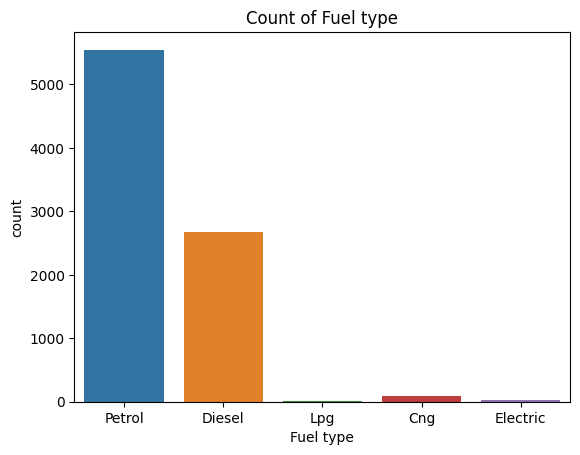

In [633]:
plt.title("Count of Fuel type")
sns.countplot(x="Fuel type", data=df, hue="Fuel type")
plt.show()

In [550]:
%matplotlib inline


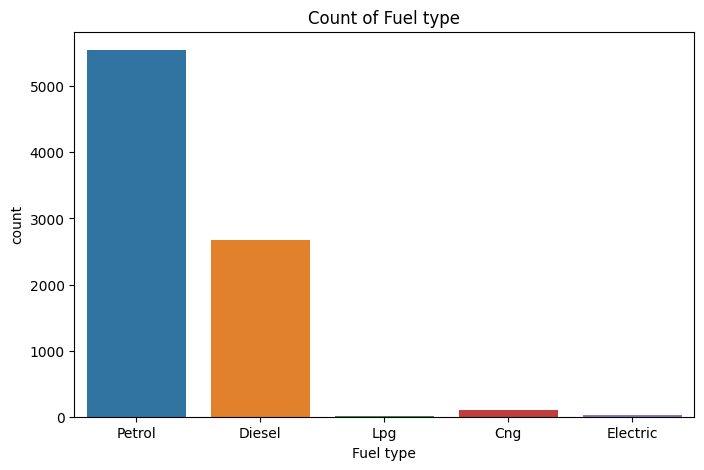

In [551]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(8,5))
plt.title("Count of Fuel type")
sns.countplot(x="Fuel type", data=df, hue="Fuel type")
plt.show()


In [552]:
pip install --upgrade matplotlib jupyterlab


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\navee\Desktop\savi\capstone3\venv\Scripts\python.exe -m pip install --upgrade pip


In [634]:
df

,Fuel type,body type,transmission,ownerNo,owner,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City,price_clean,price_lakh
0,Petrol,Hatchback,Manual,3,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5.0,White,Bangalore,4 Lakh,4.00
1,Petrol,SUV,Manual,2,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5.0,White,Bangalore,8.11 Lakh,8.11
2,Petrol,Hatchback,Manual,1,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5.0,Red,Bangalore,5.85 Lakh,5.85
3,Petrol,Sedan,Manual,1,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5.0,Others,Bangalore,4.62 Lakh,4.62
4,Diesel,SUV,Manual,1,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5.0,Gray,Bangalore,7.90 Lakh,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5.0,Others,Kolkata,5.10 Lakh,5.10
8355,Petrol,Hatchback,Manual,1,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5.0,Others,Kolkata,1.80 Lakh,1.80
8356,Petrol,Sedan,Automatic,3,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5.0,Others,Kolkata,5.50 Lakh,5.50
8357,Petrol,Hatchback,Manual,1,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5.0,Others,Kolkata,1.40 Lakh,1.40


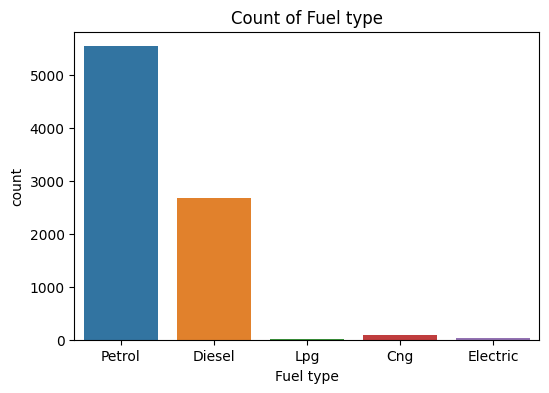

In [554]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Plot countplot using your existing DataFrame
plt.figure(figsize=(6, 4))
sns.countplot(x='Fuel type', data=df, hue='Fuel type')
plt.title("Count of Fuel type")
plt.show()


In [555]:
import matplotlib
import sys
print("matplotlib backend:", matplotlib.get_backend())
print("Python version:", sys.version)


matplotlib backend: inline
Python version: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]


In [556]:
# Since we are unable to solve the above error we have saved the plot as png image

plt.figure(figsize=(6,4))
sns.countplot(x='Fuel type', data=df, hue='Fuel type')
plt.title("Count of Fuel type")
plt.savefig("fuel_countplot.png")
plt.close()


In [557]:
df

,Fuel type,body type,transmission,ownerNo,owner,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City,price_clean,price_lakh
0,Petrol,Hatchback,Manual,3,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5.0,White,Bangalore,4 Lakh,4.00
1,Petrol,SUV,Manual,2,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5.0,White,Bangalore,8.11 Lakh,8.11
2,Petrol,Hatchback,Manual,1,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5.0,Red,Bangalore,5.85 Lakh,5.85
3,Petrol,Sedan,Manual,1,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5.0,Others,Bangalore,4.62 Lakh,4.62
4,Diesel,SUV,Manual,1,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5.0,Gray,Bangalore,7.90 Lakh,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5.0,Others,Kolkata,5.10 Lakh,5.10
8355,Petrol,Hatchback,Manual,1,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5.0,Others,Kolkata,1.80 Lakh,1.80
8356,Petrol,Sedan,Automatic,3,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5.0,Others,Kolkata,5.50 Lakh,5.50
8357,Petrol,Hatchback,Manual,1,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5.0,Others,Kolkata,1.40 Lakh,1.40


In [558]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [559]:
df["body type"].value_counts()

body type
Hatchback        3563
SUV              2222
Sedan            2171
MUV               352
Minivans           27
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [560]:
print(df.columns.tolist())


['Fuel type', 'body type', 'transmission', 'ownerNo', 'owner', 'Brand', 'model', 'modelYear', 'price', 'Insurance Validity', 'Kms Driven', 'Mileage', 'Seats', 'Color', 'City', 'price_clean', 'price_lakh']


In [561]:
# Plot and save as PNG
plt.figure(figsize=(12, 6))
plt.title("Count of Body Type")
sns.countplot(x="body type", data=df, hue="body type")
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.savefig("countplot_body_type.png")
plt.close()

In [562]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [563]:
df["transmission"].value_counts()

transmission
Manual       6046
Automatic    2313
Name: count, dtype: int64

In [564]:

# Create figure
plt.figure(figsize=(12, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.title("Count of Transmission")
plt.pie(df["transmission"].value_counts(), autopct="%1.0f%%", labels=df["transmission"].value_counts().index)

# Countplot
plt.subplot(1, 2, 2)
sns.countplot(x="transmission", data=df, hue="transmission")
plt.xlabel("Transmission")
plt.ylabel("Counts")
plt.title("Count of Transmission")

# Adjust layout and save to PNG
plt.tight_layout()
plt.savefig("countplot_transmission.png")  # Save as PNG
plt.close()


In [ ]:
df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [ ]:
df["Brand"].value_counts()

Brand
Maruti                2248
Hyundai               1651
Honda                  864
Tata                   430
Mahindra               376
Toyota                 325
Ford                   311
Renault                311
Volkswagen             294
Mercedes-Benz          244
BMW                    184
Skoda                  160
Kia                    158
Audi                   156
Jeep                   112
MG                      90
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                   41
Jaguar                  35
Fiat                    31
Mitsubishi              14
Mini                    12
Citroen                  8
Porsche                  6
Lexus                    5
Mahindra Renault         5
Isuzu                    5
Mahindra Ssangyong       4
Hindustan Motors         4
Opel                     3
Name: count, dtype: int64

In [ ]:
df["modelYear"].unique()

array([2015, 2018, 2014, 2020, 2017, 2021, 2019, 2022, 2016, 2011, 2009,
       2013, 2010, 2008, 2006, 2012, 2005, 2007, 2023, 1998, 2004, 2003,
       2001, 2002, 2000, 1985, 1997, 1999])

In [ ]:
df["Insurance Validity"].unique()

array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', '2', '1', 'Not Available'], dtype=object)

In [ ]:
df["Insurance Validity"].value_counts()

Insurance Validity
Third Party insurance    4051
Comprehensive            3150
Third Party               630
Zero Dep                  303
Not Available             221
1                           3
2                           1
Name: count, dtype: int64

In [ ]:
df["Color"].value_counts()

Color
Others                  2168
White                   1653
Silver                  1280
Red                      796
Blue                     605
                        ... 
Cherry Red                 1
golden brown               1
Technometgrn+Gryroof       1
Light Silver               1
Out Back Bronze            1
Name: count, Length: 152, dtype: int64

In [565]:
df

,Fuel type,body type,transmission,ownerNo,owner,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City,price_clean,price_lakh
0,Petrol,Hatchback,Manual,3,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5.0,White,Bangalore,4 Lakh,4.00
1,Petrol,SUV,Manual,2,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5.0,White,Bangalore,8.11 Lakh,8.11
2,Petrol,Hatchback,Manual,1,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5.0,Red,Bangalore,5.85 Lakh,5.85
3,Petrol,Sedan,Manual,1,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5.0,Others,Bangalore,4.62 Lakh,4.62
4,Diesel,SUV,Manual,1,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5.0,Gray,Bangalore,7.90 Lakh,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5.0,Others,Kolkata,5.10 Lakh,5.10
8355,Petrol,Hatchback,Manual,1,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5.0,Others,Kolkata,1.80 Lakh,1.80
8356,Petrol,Sedan,Automatic,3,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5.0,Others,Kolkata,5.50 Lakh,5.50
8357,Petrol,Hatchback,Manual,1,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5.0,Others,Kolkata,1.40 Lakh,1.40


In [635]:
df.drop('ownerNo', axis=1, inplace=True)



In [636]:
df.head()

,Fuel type,body type,transmission,owner,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City,price_clean,price_lakh
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5.0,White,Bangalore,4 Lakh,4.00
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5.0,White,Bangalore,8.11 Lakh,8.11
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5.0,Red,Bangalore,5.85 Lakh,5.85
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5.0,Others,Bangalore,4.62 Lakh,4.62
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5.0,Gray,Bangalore,7.90 Lakh,7.90


In [637]:
# Check for duplicate rows
duplicates = df.duplicated()

# Show duplicate rows
duplicate_rows = df[df.duplicated()]

In [638]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [639]:
# check seats with respect to body type
print(f'Hatchback: {df[df["body type"]=="Hatchback"]["Seats"].unique()}')
print(f'SUV: {df[df["body type"]=="SUV"]["Seats"].unique()}')
print(f'Sedan: {df[df["body type"]=="Sedan"]["Seats"].unique()}')
print(f'MUV: {df[df["body type"]=="MUV"]["Seats"].unique()}')
print(f'Coupe: {df[df["body type"]=="Coupe"]["Seats"].unique()}')
print(f'Minivans: {df[df["body type"]=="Minivans"]["Seats"].unique()}')
print(f'Convertibles: {df[df["body type"]=="Convertibles"]["Seats"].unique()}')
print(f'Hybrids: {df[df["body type"]=="Hybrids"]["Seats"].unique()}')
print(f'Wagon: {df[df["body type"]=="Wagon"]["Seats"].unique()}')
print(f'MPickup Trucks: {df[df["body type"]=="Pickup Trucks"]["Seats"].unique()}')

Hatchback: [5. 4. 6.]
SUV: [ 5.  7.  6.  8.  4.  9. 10.]
Sedan: [5. 4.]
MUV: [ 7.  8. 10.  6.  5.]
Coupe: [5. 4. 2.]
Minivans: [5. 7. 8.]
Convertibles: [4. 2.]
Hybrids: [4.]
Wagon: [5.]
MPickup Trucks: [5. 2.]


In [640]:
df.to_csv("cleaned_datas.csv")

In [641]:
# Scatterplot: Price vs Kms Driven
plt.figure(figsize=(10, 6))
plt.title("Price vs Kms Driven")
sns.scatterplot(y='price', x='Kms Driven', data=df)
plt.xlabel("Kms Driven")
plt.ylabel("Price")

# Save as PNG and close
plt.tight_layout()
plt.savefig("scatterplot_price_vs_kms.png")
plt.close()

In [642]:
# Scatterplot: Price vs Model Year
plt.figure(figsize=(10, 6))
plt.title("Price vs Model Year")
sns.scatterplot(y='price', x='modelYear', data=df)
plt.xlabel("Model Year")
plt.ylabel("Price")

# Save plot as PNG
plt.tight_layout()
plt.savefig("scatterplot_price_vs_modelYear.png")
plt.close()

In [ ]:
# Boxplot: Transmission vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title("Price Distribution by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Price")

# Save plot as PNG
plt.tight_layout()
plt.savefig("boxplot_price_vs_transmission.png")
plt.close()

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='modelYear', y='price', data=df)
plt.title("Price Distribution by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Price")

plt.tight_layout()
plt.savefig("boxplot_price_vs_modelYear.png")
plt.close()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='body type', y='price', data=df)
plt.title("Price Distribution by Body Type")
plt.xlabel("Body Type")
plt.ylabel("Price")
plt.xticks(rotation=45)  # Rotate x labels for better readability if needed

plt.tight_layout()
plt.savefig("boxplot_price_vs_body_type.png")
plt.close()

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(x=df["price"], kde=True)  # distplot is deprecated, use histplot
plt.title("Distribution of Price")

plt.tight_layout()
plt.savefig("distribution_price_before_outliers.png")
plt.close()

In [643]:
# Removing outliers from the 'price' column using IQR method
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers from DataFrame
df_filtered = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Count of lower outliers
low_outliers = len(df[df['price'] < (Q1 - 1.5 * IQR)])

# Count of upper outliers
high_outliers = len(df[df['price'] > (Q3 + 1.5 * IQR)])

# Print outlier counts
print(f"Count of lower outliers: {low_outliers}")
print(f"Count of upper outliers: {high_outliers}")

Count of lower outliers: 0
Count of upper outliers: 878


In [644]:
df_filtered.reset_index(inplace=True,drop=True)
df_filtered

,Fuel type,body type,transmission,owner,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City,price_clean,price_lakh
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5.0,White,Bangalore,4 Lakh,4.00
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5.0,White,Bangalore,8.11 Lakh,8.11
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5.0,Red,Bangalore,5.85 Lakh,5.85
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5.0,Others,Bangalore,4.62 Lakh,4.62
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5.0,Gray,Bangalore,7.90 Lakh,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5.0,Others,Kolkata,5.10 Lakh,5.10
7477,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5.0,Others,Kolkata,1.80 Lakh,1.80
7478,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5.0,Others,Kolkata,5.50 Lakh,5.50
7479,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5.0,Others,Kolkata,1.40 Lakh,1.40


In [645]:
df[df["Brand"] == "BMW"]["price"].max()

np.float64(130.0)

In [646]:
max_price_index = df_filtered["price"].idxmax()
max_price_row = df_filtered.loc[max_price_index]
print(max_price_row)

Fuel type                           Diesel
body type                              MUV
transmission                        Manual
owner                                    2
Brand                               Toyota
model                 Toyota Innova Crysta
modelYear                             2016
price                                17.75
Insurance Validity           Comprehensive
Kms Driven                          157000
Mileage                              13.68
Seats                                  8.0
Color                                White
City                             Bangalore
price_clean                     17.75 Lakh
price_lakh                           17.75
Name: 1163, dtype: object


In [647]:
import os
import shutil

# Name of the folder where you want to move all PNG images
folder_name = "plots"

# Create the folder if it doesn't exist
os.makedirs(folder_name, exist_ok=True)

# List all files in current directory
files = os.listdir()

# Filter PNG files (you can customize this if your files have different extensions)
png_files = [f for f in files if f.endswith(".png")]

# Move each PNG file into the folder
for file in png_files:
    shutil.move(file, os.path.join(folder_name, file))

print(f"Moved {len(png_files)} PNG files to the '{folder_name}' folder.")


Moved 0 PNG files to the 'plots' folder.


Scaling and encoding

In [648]:
import pickle

In [649]:
# creating a list to hold name of the categorical columns
catg_col=df_filtered.select_dtypes(include="object").columns.to_list()

In [650]:
df_filtered

,Fuel type,body type,transmission,owner,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City,price_clean,price_lakh
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5.0,White,Bangalore,4 Lakh,4.00
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5.0,White,Bangalore,8.11 Lakh,8.11
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5.0,Red,Bangalore,5.85 Lakh,5.85
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5.0,Others,Bangalore,4.62 Lakh,4.62
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5.0,Gray,Bangalore,7.90 Lakh,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5.0,Others,Kolkata,5.10 Lakh,5.10
7477,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5.0,Others,Kolkata,1.80 Lakh,1.80
7478,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5.0,Others,Kolkata,5.50 Lakh,5.50
7479,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5.0,Others,Kolkata,1.40 Lakh,1.40


In [651]:
catg_col

['Fuel type',
 'body type',
 'transmission',
 'Brand',
 'model',
 'Insurance Validity',
 'Color',
 'City',
 'price_clean']

In [652]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
encoder.fit(df_filtered[catg_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [653]:
encoder.categories_

[array(['Cng', 'Diesel', 'Electric', 'Lpg', 'Petrol'], dtype=object),
 array(['Convertibles', 'Coupe', 'Hatchback', 'MUV', 'Minivans',
        'Pickup Trucks', 'SUV', 'Sedan', 'Wagon'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Datsun', 'Fiat', 'Ford',
        'Hindustan Motors', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
        'Kia', 'Land Rover', 'MG', 'Mahindra', 'Mahindra Renault',
        'Mahindra Ssangyong', 'Maruti', 'Mercedes-Benz', 'Mini',
        'Mitsubishi', 'Nissan', 'Opel', 'Renault', 'Skoda', 'Tata',
        'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
 array(['Ambassador', 'Audi A3', 'Audi A4', 'Audi A6', 'Audi Q3',
        'Audi Q5', 'Audi Q7', 'BMW 1 Series', 'BMW 3 Series',
        'BMW 3 Series GT', 'BMW 5 Series', 'BMW 6 Series', 'BMW 7 Series',
        'BMW X1', 'BMW X3', 'BMW X5', 'Chevrolet Aveo',
        'Chevrolet Aveo U-VA', 'Chevrolet Beat', 'Chevrolet Captiva',
        'Chevrolet

In [654]:
#list of new column
new_encoded_col= list(encoder.get_feature_names_out(catg_col))
new_encoded_col

['Fuel type_Cng',
 'Fuel type_Diesel',
 'Fuel type_Electric',
 'Fuel type_Lpg',
 'Fuel type_Petrol',
 'body type_Convertibles',
 'body type_Coupe',
 'body type_Hatchback',
 'body type_MUV',
 'body type_Minivans',
 'body type_Pickup Trucks',
 'body type_SUV',
 'body type_Sedan',
 'body type_Wagon',
 'transmission_Automatic',
 'transmission_Manual',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Citroen',
 'Brand_Datsun',
 'Brand_Fiat',
 'Brand_Ford',
 'Brand_Hindustan Motors',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Isuzu',
 'Brand_Jaguar',
 'Brand_Jeep',
 'Brand_Kia',
 'Brand_Land Rover',
 'Brand_MG',
 'Brand_Mahindra',
 'Brand_Mahindra Renault',
 'Brand_Mahindra Ssangyong',
 'Brand_Maruti',
 'Brand_Mercedes-Benz',
 'Brand_Mini',
 'Brand_Mitsubishi',
 'Brand_Nissan',
 'Brand_Opel',
 'Brand_Renault',
 'Brand_Skoda',
 'Brand_Tata',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Brand_Volvo',
 'model_Ambassador',
 'model_Audi A3',
 'model_Audi A4',
 'model_Audi A6',
 'model_Audi Q3',

In [655]:
# transforming the data
df_filtered[new_encoded_col]=encoder.transform(df_filtered[catg_col])
df_filtered.head()

,Fuel type,body type,transmission,owner,Brand,model,modelYear,price,Insurance Validity,Kms Driven,...,"price_clean_90,000","price_clean_93,982","price_clean_94,353","price_clean_94,723","price_clean_95,000","price_clean_96,000","price_clean_96,295","price_clean_98,000","price_clean_99,000","price_clean_99,703"
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [656]:
# drop the unwanted columns
df_filtered.drop(columns=catg_col,inplace=True)
df_filtered

,owner,modelYear,price,Kms Driven,Mileage,Seats,price_lakh,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,...,"price_clean_90,000","price_clean_93,982","price_clean_94,353","price_clean_94,723","price_clean_95,000","price_clean_96,000","price_clean_96,295","price_clean_98,000","price_clean_99,000","price_clean_99,703"
0,3,2015,4.00,120000,23.10,5.0,4.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,8.11,32706,17.00,5.0,8.11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2018,5.85,11949,23.84,5.0,5.85,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2014,4.62,17794,19.10,5.0,4.62,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2015,7.90,60000,23.65,5.0,7.90,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,1,2022,5.10,10000,25.24,5.0,5.10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7477,1,2014,1.80,120000,22.74,5.0,1.80,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7478,3,2011,5.50,50000,11.74,5.0,5.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7479,1,2012,1.40,40000,18.50,5.0,1.40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [657]:
df_filtered.drop(columns=[col for col in df_filtered.columns if 'price_clean' in col], inplace=True)


In [658]:
df_filtered

,owner,modelYear,price,Kms Driven,Mileage,Seats,price_lakh,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,3,2015,4.00,120000,23.10,5.0,4.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,8.11,32706,17.00,5.0,8.11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,2018,5.85,11949,23.84,5.0,5.85,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,2014,4.62,17794,19.10,5.0,4.62,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,2015,7.90,60000,23.65,5.0,7.90,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,1,2022,5.10,10000,25.24,5.0,5.10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7477,1,2014,1.80,120000,22.74,5.0,1.80,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7478,3,2011,5.50,50000,11.74,5.0,5.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7479,1,2012,1.40,40000,18.50,5.0,1.40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [659]:
with open('encoder.pkl','wb') as file:
    pickle.dump(encoder,file)

In [660]:
df_filtered.to_csv("filtered_datas.csv")